# Credit Card Fraud Detection using KNN

## Project Objective
The objective of this project is to analyze a real-world highly imbalanced credit card transaction dataset and build a machine learning model to detect fraudulent transactions.

The dataset contains 284,807 transactions, out of which only 492 are fraudulent, making fraud detection a challenging classification problem.


## Import Required Libraries
Python libraries for data manipulation, visualization, and machine learning are imported in this section.


In [27]:
# Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading
The dataset contains credit card transactions where the target variable `Class` indicates fraud (1) and non-fraud (0).


In [28]:
# Dataset Loading
data = pd.read_csv("C:\\Users\\Hp\\Downloads\\creditcard.csv\\creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA)
EDA is performed to understand the structure of the dataset, data types, summary statistics, and overall characteristics of the data.


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Missing Value Analysis
Checking whether the dataset contains missing values to ensure data quality.


In [30]:
# missing vlaue
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Class Distribution Analysis
Fraud detection is an imbalanced classification problem. This section analyzes the distribution of fraudulent and non-fraudulent transactions.


In [31]:
# lable/output data count
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Statistical Summary of Features
Descriptive statistics are used to understand feature distributions and detect potential outliers.


In [32]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Visualization
Visualizations are used to explore feature distributions and relationships between variables.


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

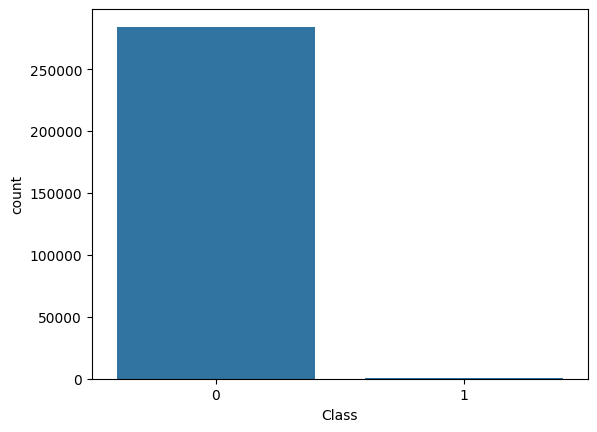

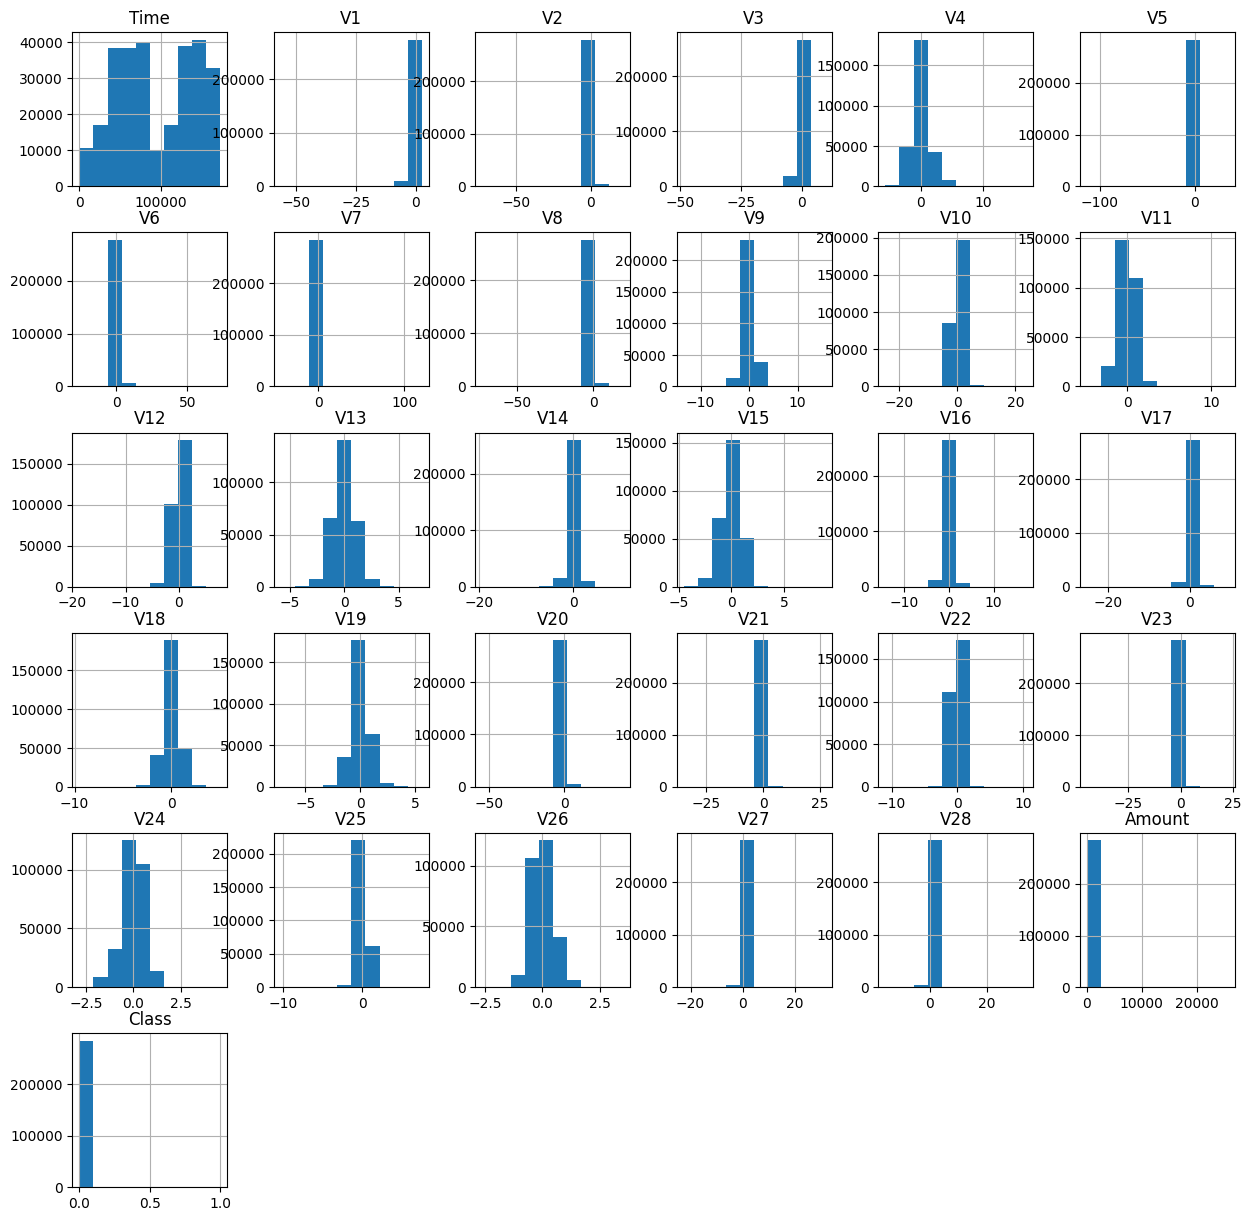

In [33]:
# Countplot
sns.countplot(x="Class", data=data)
data.hist(figsize=(15,15))

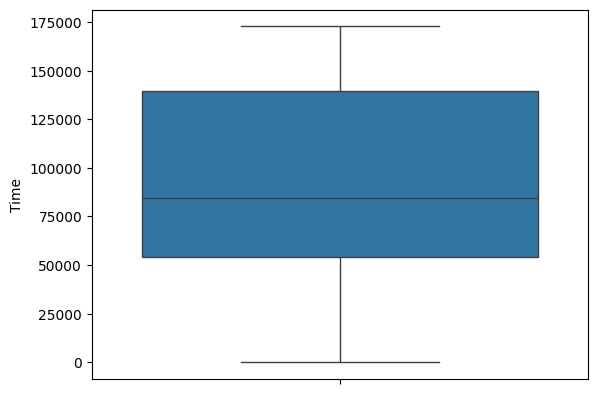

In [34]:
# box plot
sns.boxplot(data=data["Time"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

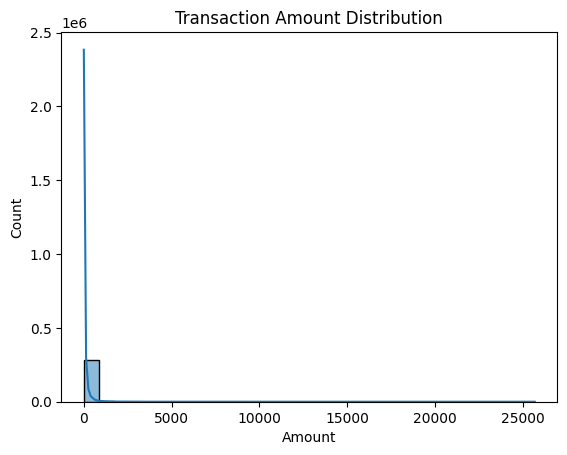

In [35]:
# Hisplot
plt.Figure(figsize=(12,10))
sns.histplot(data["Amount"],bins=30,kde=True)
plt.title("Transaction Amount Distribution")
plt.show

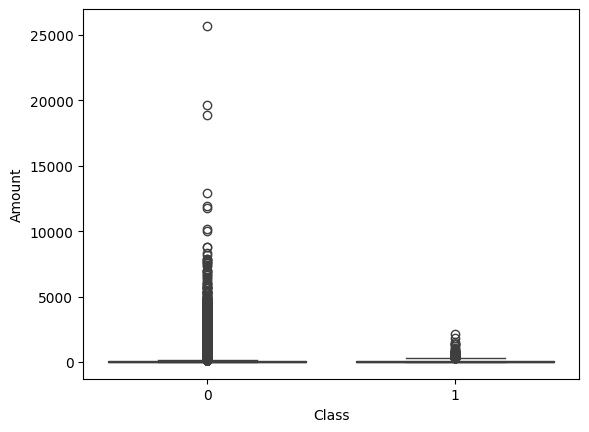

In [36]:
sns.boxplot(x="Class", y="Amount", data=data)
plt.show()

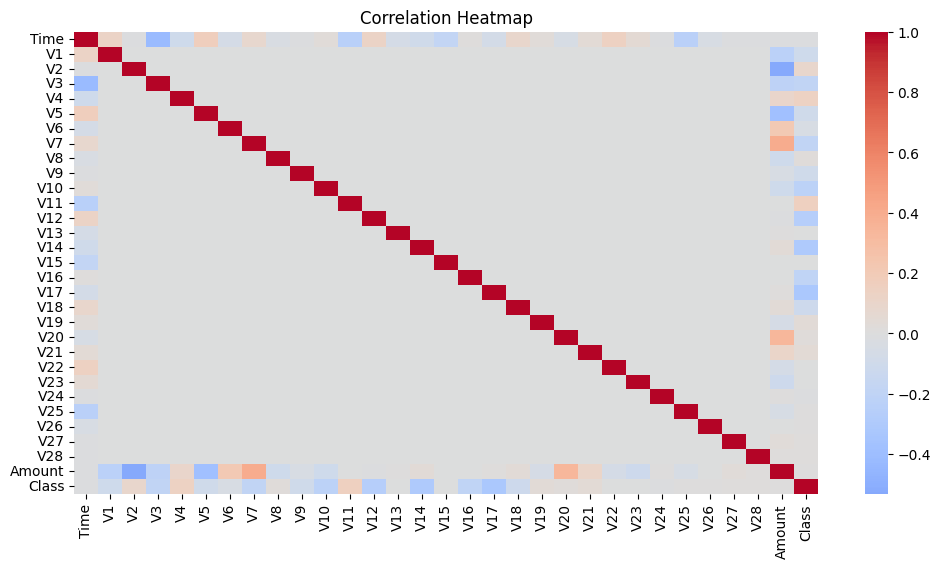

In [37]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [38]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd
from datashader.utils import export_image
import matplotlib.pyplot as plt


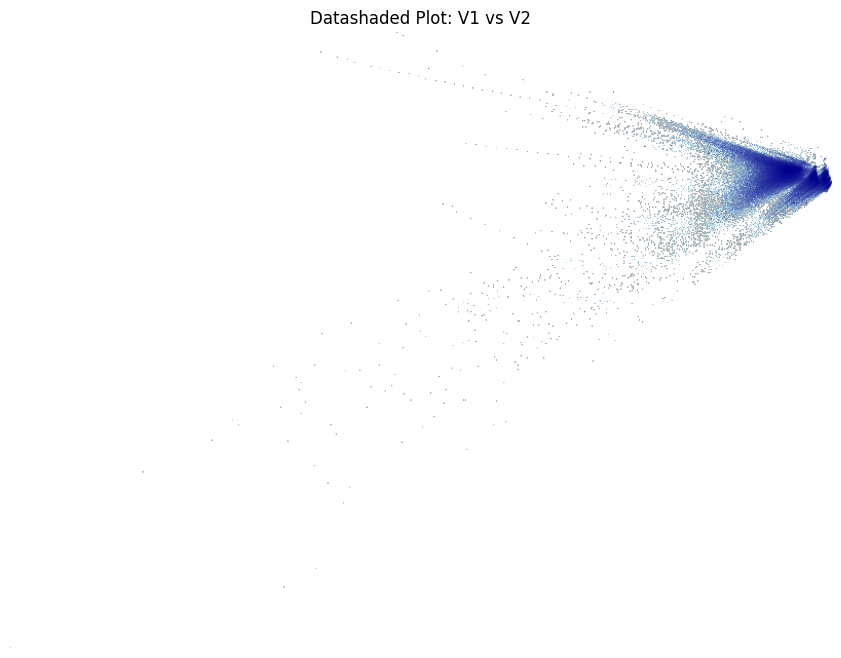

In [39]:
# Canvas
canvas = ds.Canvas(
    plot_width=800,
    plot_height=600,
    x_range=(data["V1"].min(), data["V1"].max()),
    y_range=(data["V2"].min(), data["V2"].max())
)

# Aggregate
agg = canvas.points(data, 'V1', 'V2')

# Shade
img = tf.shade(agg, cmap=["lightblue", "darkblue"])

# Show
plt.figure(figsize=(18,8))
plt.imshow(img.to_pil())
plt.axis("off")
plt.title("Datashaded Plot: V1 vs V2")
plt.show()

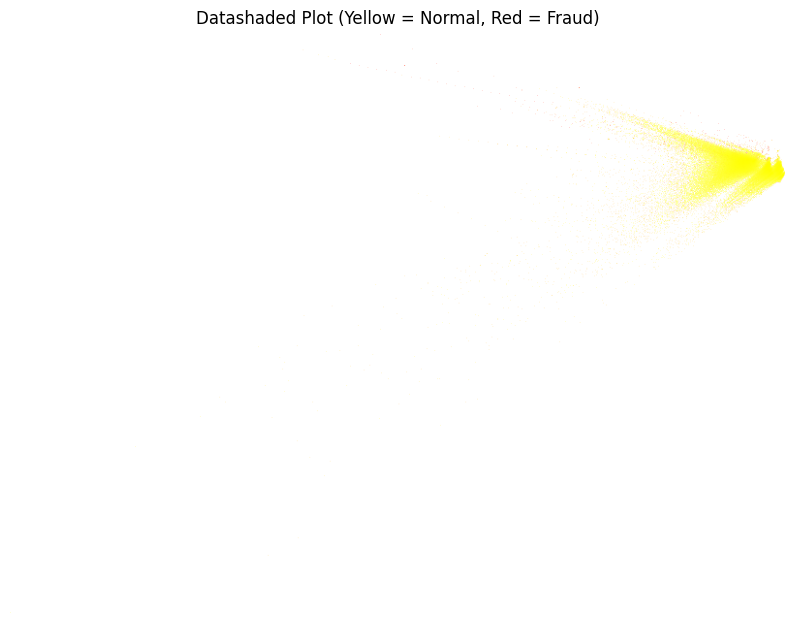

In [40]:
data["Class"] = data["Class"].astype("category") 

agg = canvas.points(data, 'V1', 'V2', agg=ds.count_cat('Class'))

img = tf.shade(
    agg,
    color_key={0: "yellow", 1: "red"},
    how="eq_hist"
)

plt.figure(figsize=(10,10))
plt.imshow(img.to_pil())
plt.axis("off")
plt.title("Datashaded Plot (Yellow = Normal, Red = Fraud)")
plt.show()

## Data Preprocessing
The dataset is prepared for modeling by splitting into training and testing sets and applying feature scaling.


In [41]:
# input features
X = data.drop("Class", axis=1)
y = data["Class"]

## Multicollinearity Analysis using VIF
Variance Inflation Factor (VIF) is used to detect multicollinearity among input features. Features with high VIF values indicate strong correlation and may be removed.


In [42]:
# VIF checking
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif_const.values, i)
    for i in range(X_vif_const.shape[1])
]

print(vif_data)

   Variable        VIF
0     const  10.065370
1      Time   1.879865
2        V1   1.651908
3        V2   4.422390
4        V3   1.877342
5        V4   1.138061
6        V5   2.859316
7        V6   1.571530
8        V7   2.929040
9        V8   1.131633
10       V9   1.023894
11      V10   1.126333
12      V11   1.115328
13      V12   1.030070
14      V13   1.008474
15      V14   1.031854
16      V15   1.063421
17      V16   1.000448
18      V17   1.010701
19      V18   1.031048
20      V19   1.039643
21      V20   2.399180
22      V21   1.140305
23      V22   1.089101
24      V23   1.158142
25      V24   1.000806
26      V25   1.130801
27      V26   1.003359
28      V27   1.010105
29      V28   1.001433
30   Amount  12.116701


### Train-Test Split
The dataset is split into training and testing sets to evaluate model performance on unseen data.


In [43]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
)

### Feature Scaling
StandardScaler is used to normalize features so that all variables contribute equally to distance calculations in KNN.


In [44]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
prev_acc = 0
k = 1

while True:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    if acc < prev_acc:
        break
    
    prev_acc = acc
    best_k = k
    k += 2

print("best_k:",best_k)


best_k: 3


In [46]:
# fit the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Model Prediction
The trained model is used to predict fraud labels for the test dataset.


In [47]:
# prediction
from sklearn.metrics import classification_report, roc_auc_score

y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

In [48]:
# ROC curve
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.79      0.85       136

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC: 0.9373824315499935


### Confusion Matrix
The confusion matrix shows the number of correctly and incorrectly classified transactions.


In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[85297,    10],
       [   29,   107]])

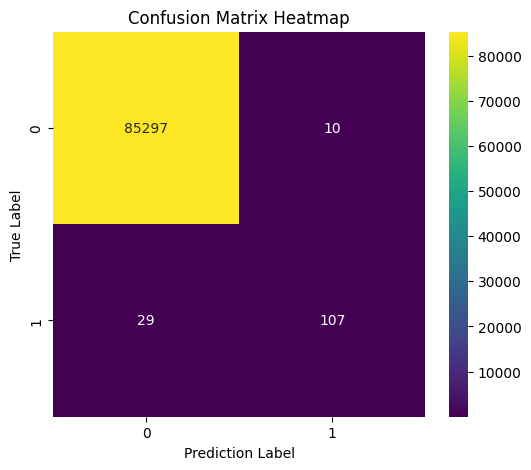

In [50]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")

plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

## Model Evaluation
Model performance is evaluated using confusion matrix, precision, recall, F1-score, and ROC AUC. Recall is particularly important for fraud detection.


In [51]:
# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.9995
Precision: 0.9145
Recall: 0.7868
F1 Score: 0.8458
Sensitivity: 0.7868
Specificity: 0.9999


AUC: 0.937


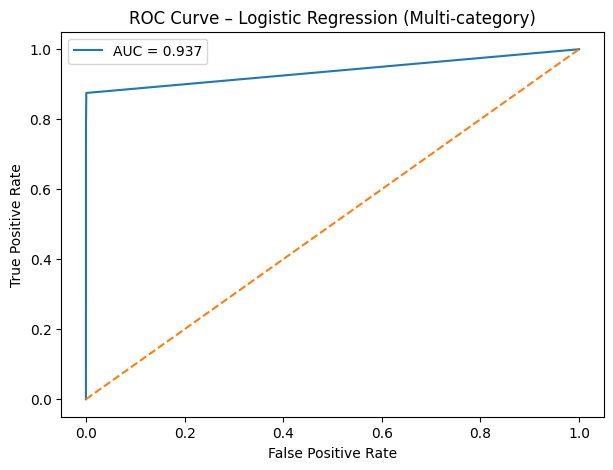

In [52]:
# ROC curve & AUC
from sklearn.metrics import roc_curve, auc

auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _=roc_curve(y_test, y_prob)

print("AUC:", round(auc, 3))

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Multi-category)")
plt.legend()
plt.show()

## Conclusion
This project demonstrates fraud detection using the KNN algorithm. Due to extreme class imbalance, detecting fraudulent transactions remains challenging. Future work may include advanced models and imbalance handling techniques such as SMOTE to improve fraud detection performance.
